<a href="https://colab.research.google.com/github/pingao2019/DS-Unit-2-Applied-Modeling/blob/master/H3_Copy_of_LS_DS_233_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---

#Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.
Assignment

Complete these tasks for your project, and document your work.

    If you haven't completed assignment #1, please do so first.
    Continue to clean and explore your data. Make exploratory visualizations.
    Fit a model. Does it beat your baseline?
    Try xgboost.
    Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.
Reading

Top recommendations in bold italic:
Permutation Importances

    Kaggle / Dan Becker: Machine Learning Explainability
    Christoph Molnar: Interpretable Machine Learning

(Default) Feature Importances

    Ando Saabas: Selecting good features, Part 3, Random Forests
    Terence Parr, et al: Beware Default Random Forest Importances

Gradient Boosting

    A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning
    A Kaggle Master Explains Gradient Boosting
    An Introduction to Statistical Learning Chapter 8
    Gradient Boosting Explained
    Boosting (2.5 minute video)



My dataset is from https://www.bls.gov/web/cewqtr.supp.toc.htm

Choose your target.----------wage.

Which column in your tabular dataset will you predict?----Average Weekly Wage

Is your problem regression or classification?-------------regression



In [2]:
!pip install category_encoders==2.*

!pip install eli5

In [4]:
%%capture
import sys

# If you're on Colab:
#if 'google.colab' in sys.modules:
 #   DATA_PATH = 'https:// '


# If you're working locally:
DATA_PATH = 'C:\Users\abc\Desktop\dataset search/2019_2ndQ_wage_industry.xlsx/'

SyntaxError: ignored

In [5]:
import pandas as pd
df=pd.read_excel('2019_2ndQ_wage_industry.xlsx')
print(df.shape)
df.head()

(62742, 21)


,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,Ownership,Industry,Status Code,Establishment Count,April Employment,May Employment,June Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,US000,US,0.0,0,10,2019,2,Nation,NaN,U.S. TOTAL,Total Covered,"10 Total, all industries",NaN,10252043,147522541,148607380,149089158,2111761785894,1095,1.0,1.0
1,US000,US,0.0,1,10,2019,2,Nation,NaN,U.S. TOTAL,Federal Government,"10 Total, all industries",NaN,59824,2800541,2814885,2827888,59738450845,1633,1.0,1.0
2,US000,US,0.0,2,10,2019,2,Nation,NaN,U.S. TOTAL,State Government,"10 Total, all industries",NaN,69905,4680392,4678471,4605421,72130616273,1192,1.0,1.0
3,US000,US,0.0,3,10,2019,2,Nation,NaN,U.S. TOTAL,Local Government,"10 Total, all industries",NaN,171092,14591536,14698871,14377408,197299604678,1043,1.0,1.0
4,US000,US,0.0,5,10,2019,2,Nation,NaN,U.S. TOTAL,Private,"10 Total, all industries",NaN,9951222,125450072,126415153,127278441,1782593114098,1085,1.0,1.0


There are 13 weeks in this quarter. According to BLS describe about this data set,"average weekly wage values are calculated by dividing quarterly total wages by the average of the three monthly."Average weekly wages are affected by the ratio of full-time to part-time workers as well as the number of 
individuals in high-paying and low-paying occupations and the incidence of pay periods within a quarter. For instance, the average weekly wage of the workforce could increase significantly when there is a large decline in 
the number of employees that had been receiving below-average wages. Wages may include payments to workers not present in the employment counts because they did not work during the pay period including the 12th of the 
month. When comparing average weekly wage levels between industries, states, or quarters, these factors should 
be taken into consideration.


In [7]:
df.isnull().sum()

Area\nCode                                           0
St                                                6709
Cnty                                              6709
Own                                                  0
NAICS                                                0
Year                                                 0
Qtr                                                  0
Area Type                                            0
St Name                                           6727
Area                                                 0
Ownership                                            0
Industry                                             0
Status Code                                      59123
Establishment Count                                  0
April Employment                                     0
May Employment                                       0
June Employment                                      0
Total Quarterly Wages                                0
Average We

In [8]:
df.columns.to_list()

['Area\nCode',
 'St',
 'Cnty',
 'Own',
 'NAICS',
 'Year',
 'Qtr',
 'Area Type',
 'St Name',
 'Area',
 'Ownership',
 'Industry',
 'Status Code',
 'Establishment Count',
 'April Employment',
 'May Employment',
 'June Employment',
 'Total Quarterly Wages',
 'Average Weekly Wage',
 'Employment Location Quotient Relative to U.S.',
 'Total Wage Location Quotient Relative to U.S.']

In [0]:
df= df.drop(columns=['Cnty',  'St Name', 'Status Code'])

In [0]:
df=df.drop(columns=['Year','Qtr','Total Quarterly Wages'])

In [11]:
df.describe()

,Own,NAICS,Establishment Count,April Employment,May Employment,June Employment,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
count,62742.000000,62742.000000,6.274200e+04,6.274200e+04,6.274200e+04,6.274200e+04,62742.000000,62742.000000,62742.000000
mean,4.195977,624.283399,2.453553e+03,3.350102e+04,3.374713e+04,3.390944e+04,798.408466,1.072296,1.110454
std,1.568151,483.586548,7.083353e+04,9.306942e+05,9.374311e+05,9.419742e+05,383.358658,3.158758,3.167968
min,0.000000,10.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,5.000000,10.000000,1.900000e+01,1.390000e+02,1.430000e+02,1.450000e+02,621.000000,0.500000,0.412500
50%,5.000000,1012.000000,7.200000e+01,8.940000e+02,9.070000e+02,9.170000e+02,785.000000,0.860000,0.830000
75%,5.000000,1024.000000,3.730000e+02,5.259000e+03,5.312000e+03,5.342000e+03,981.000000,1.100000,1.140000
max,5.000000,1029.000000,1.025204e+07,1.475225e+08,1.486074e+08,1.490892e+08,6538.000000,655.850000,620.910000


In [12]:
df.columns.to_list()

['Area\nCode',
 'St',
 'Own',
 'NAICS',
 'Area Type',
 'Area',
 'Ownership',
 'Industry',
 'Establishment Count',
 'April Employment',
 'May Employment',
 'June Employment',
 'Average Weekly Wage',
 'Employment Location Quotient Relative to U.S.',
 'Total Wage Location Quotient Relative to U.S.']

In [13]:
df.select_dtypes(exclude="number").columns.tolist()

['Area\nCode', 'St', 'Area Type', 'Area', 'Ownership', 'Industry']

In [14]:
df['Area\nCode'].value_counts()

21081    18
17101    18
06073    18
06019    18
48091    18
         ..
31117    12
38087    11
19999    11
31007    11
11999    10
Name: Area\nCode, Length: 3624, dtype: int64

In [0]:
# drop na in the state(St)
df=df.dropna(subset=['St'])

In [16]:
df.isnull().sum()

Area\nCode                                       0
St                                               0
Own                                              0
NAICS                                            0
Area Type                                        0
Area                                             0
Ownership                                        0
Industry                                         0
Establishment Count                              0
April Employment                                 0
May Employment                                   0
June Employment                                  0
Average Weekly Wage                              0
Employment Location Quotient Relative to U.S.    0
Total Wage Location Quotient Relative to U.S.    0
dtype: int64

In [17]:
df['St'].unique()

array(['US', '01', '02', '04', '05', '06', '08', '09', '10', '11', '12',
       '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47',
       '48', '49', '50', '51', '53', '54', '55', '56'], dtype=object)

In [18]:
df['Own'].value_counts()

5    43161
0     3243
1     3240
3     3227
2     3162
Name: Own, dtype: int64

In [19]:
df['Area Type'].unique()

array(['Nation', 'State', 'County'], dtype=object)

In [20]:
df['Area'].unique()


array(['U.S. TOTAL', 'Alabama -- Statewide', 'Autauga County, Alabama',
       ..., 'Washakie County, Wyoming', 'Weston County, Wyoming',
       'Unknown Or Undefined, Wyoming'], dtype=object)

In [21]:
df['Area'].describe()

count                    56033
unique                    3242
top       District of Columbia
freq                        36
Name: Area, dtype: object

In [22]:
df['Ownership'].unique()

array(['Total Covered', 'Federal Government', 'State Government',
       'Local Government', 'Private'], dtype=object)

In [23]:
df['Industry'].unique()

array(['10 Total, all industries', '101 Goods-producing',
       '1011 Natural resources and mining', '1012 Construction',
       '1013 Manufacturing', '102 Service-providing',
       '1021 Trade, transportation, and utilities', '1022 Information',
       '1023 Financial activities',
       '1024 Professional and business services',
       '1025 Education and health services',
       '1026 Leisure and hospitality', '1027 Other services',
       '1029 Unclassified'], dtype=object)

In [24]:
df['NAICS'].describe()

count    56033.000000
mean       623.649010
std        483.698825
min         10.000000
25%         10.000000
50%       1012.000000
75%       1024.000000
max       1029.000000
Name: NAICS, dtype: float64

In [25]:
df['Establishment Count'].describe()

count    5.603300e+04
mean     2.163361e+03
std      7.448280e+04
min      1.000000e+00
25%      1.600000e+01
50%      5.700000e+01
75%      2.700000e+02
max      1.025204e+07
Name: Establishment Count, dtype: float64

In [0]:
import numpy as np


In [28]:
df['Employment Location Quotient Relative to U.S.'].describe()

count    56033.000000
mean         1.084267
std          3.323905
min          0.000000
25%          0.480000
50%          0.850000
75%          1.110000
max        655.850000
Name: Employment Location Quotient Relative to U.S., dtype: float64

In [29]:
df['Total Wage Location Quotient Relative to U.S.'].describe()

count    56033.000000
mean         1.125547
std          3.331689
min          0.000000
25%          0.400000
50%          0.820000
75%          1.150000
max        620.910000
Name: Total Wage Location Quotient Relative to U.S., dtype: float64

In [30]:
df['Average Weekly Wage'].describe()

count    56033.000000
mean       784.927204
std        378.885403
min          0.000000
25%        611.000000
50%        770.000000
75%        964.000000
max       6538.000000
Name: Average Weekly Wage, dtype: float64

 How is your target distributed?


Regression: Is the target right-skewed? If so, you may want to log transform the target.



In [31]:
#Mean baseline 
df['Average Weekly Wage'].mean()




784.9272036121571

In [18]:
# My target to predict is Average Weekly Wage. From the baseline, I guessed the majority class for every prediction. And get baseline accuracy 
baseline= df['Average Weekly Wage'].mean()
errors = baseline- df['Average Weekly Wage']
mean_absolute_error = errors.abs().mean()
print(f'If we just guessed every wage for ${baseline:,.3f},')
print(f'we would be off by ${mean_absolute_error:,.3f} on average.')

If we just guessed every wage for $798.408,
we would be off by $268.482 on average.


In [8]:
df.shape

(62742, 15)

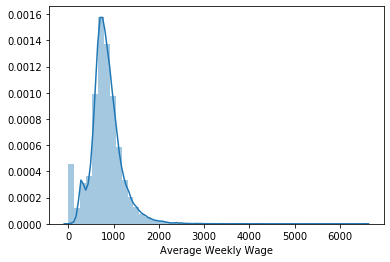

In [15]:
import seaborn as sns
y= df['Average Weekly Wage']
sns.distplot(y);

### Lower bound and Upper Bound are numberic data. From following I will check whether they are outliers.  Do I need  exclude them? 

Yes, there are outliers. Some really high and some really low. I will remove the most extreme 1% wage.

In [13]:
import numpy as np
df= df[(df['Average Weekly Wage'] >= np.percentile(df['Average Weekly Wage'],0.5))]
df.shape     


(62742, 15)

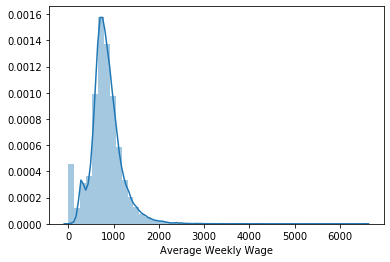

In [16]:
y=df['Average Weekly Wage']
sns.distplot(y);

The log1p and expm was being taken due to uneven distribution of the target variables. The shape is  right_skewed . So we need log -Transform the target. 

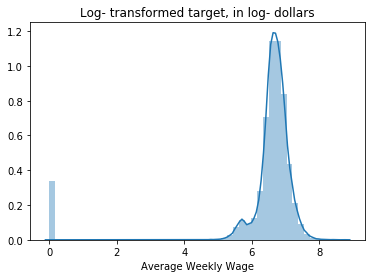

In [17]:
y_log = np.log1p(y)
import matplotlib.pyplot as plt

sns.distplot(y_log)
plt.title('Log- transformed target, in log- dollars');

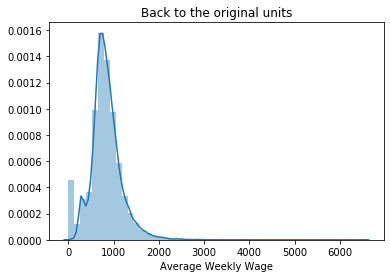

In [18]:
y_untransformed = np.expm1(y_log)
sns.distplot(y_untransformed)
plt.title('Back to the original units');

In [0]:
y= y_untransformed

In [20]:
y.shape

(62742,)

In [23]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                               random_state=42)

train.shape, test.shape 

((50193, 15), (12549, 15))

In [24]:
train, val = train_test_split(train,  test_size=0.2,random_state=42)
train.shape,  val.shape

((40154, 15), (10039, 15))

In [0]:
target = 'Average Weekly Wage'
features= df.columns. drop([target])

In [0]:
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor


In [46]:
# Method 1: using Linear Regression model
from sklearn.linear_model import LinearRegression

lr = make_pipeline(
    ce.TargetEncoder(),  
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 0.4603666991356523


In [47]:
coefficients = lr.named_steps['linearregression'].coef_
pd.Series(coefficients, features)

Area\nCode                                        -0.148902
St                                                 0.037792
Own                                               19.176296
NAICS                                              0.027356
Area Type                                          0.054863
Area                                               1.118346
Ownership                                          1.011532
Industry                                           0.954363
Establishment Count                               -0.000405
April Employment                                   0.003317
May Employment                                    -0.004585
June Employment                                    0.001315
Employment Location Quotient Relative to U.S.   -102.359355
Total Wage Location Quotient Relative to U.S.    113.003887
dtype: float64

In [48]:
# Method 2:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Gradient Boosting R^2 0.7822288290668922


In [0]:
#Method 3: fit RandomForestRegressor model
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test =test[target]

In [29]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(max_depth=2)
)
pipeline.fit(X_train,y_train)
print('Validation Accuracy:', pipeline.score(X_val,y_val))

Validation Accuracy: 0.3955837419853811


In [0]:
import graphviz

In [0]:
# This score is too good to be true.
# Visualize the RandomeForestClassification to see what the model "learned"
target = 'Average Weekly Wage'
features= df.columns. drop([target])
X_train =X_train[features]

X_val = X_val[features]


In [31]:
encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_train)
print('X_train shape after encoding', encoded.shape)

X_train shape after encoding (40154, 7331)


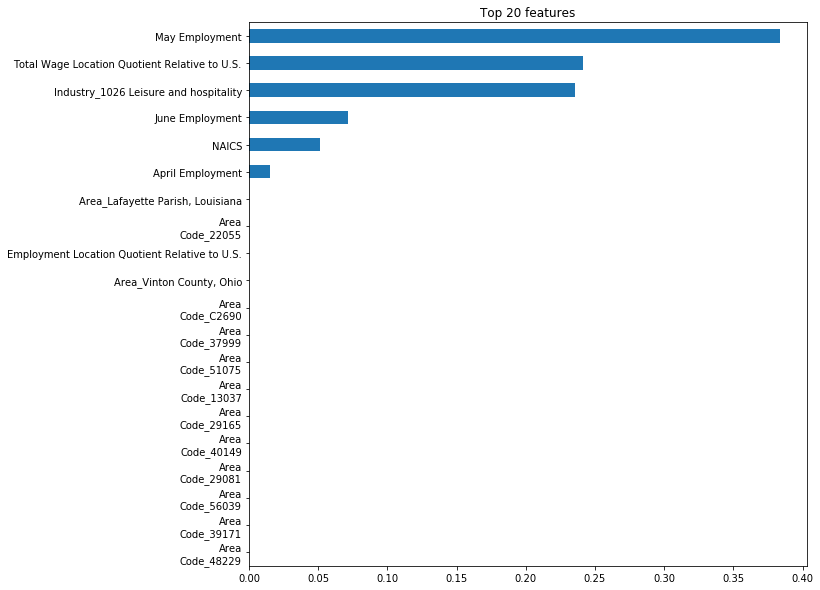

In [32]:
# To get feature importances
%matplotlib inline
import matplotlib.pyplot as plt

rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot top n feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [35]:
transformers = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestRegressor(n_estimators=30, random_state=24, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=24, verbose=0, warm_start=False)

In [0]:
#Using eli5 to do PermutationImportance

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, 
    #scoring='accuracy', 
    n_iter=1, 
    random_state=1
)

permuter.fit(X_val_transformed, y_val)

In [0]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

In [0]:
# 2. Display permutation importances
eli5.show_weights(
    permuter, 
    top=None, # No limit: show permutation importances for all features
    feature_names=feature_names # must be a list
)

We can use importances for feature selection. 
We can remove features with zero importance. The model trains faster and the score does not decrease.

In [0]:
print('Shape before removing features:', X_train.shape)

In [0]:
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]

In [0]:
print('Shape after removing features:', X_train.shape)

In [0]:
X_val = X_val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

In [0]:
#from sklearn.metrics import mean_absolute_error, mean_squared_error

###Avoid Overfitting By Early Stopping With XGBoost.

In [0]:
encoder = ce.OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBClassifier(
    n_estimators=200, # <= 1000 trees, depend on early stopping
    max_depth=3,       
    learning_rate=0.5, # try higher learning rate
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='merror', 
          early_stopping_rounds=50) # Stop if the score hasn't improved in 50 rounds

###Plotting for Validation Curve of this XGBoost model

In [0]:
results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = list(range(1, len(train_error)+1))
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.title('Validation Curve for this XGBoost model')
plt.ylim((0.18, 0.22)) # Zoom in
plt.legend();

The MSE, MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis. MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

